In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tflearn
from tflearn.data_utils import shuffle, to_categorical

In [2]:
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)

In [3]:
# Building the encoder
srcData = tflearn.input_data(shape=[None, 32, 32, 3])

encoder = tflearn.conv_2d(srcData, 4, 3)
encoder = tflearn.max_pool_2d(encoder, 2)
encoder = tflearn.conv_2d(encoder, 8, 3)
encoder = tflearn.max_pool_2d(encoder, 2)
encoder = tflearn.conv_2d(encoder, 16, 3)
encoder = tflearn.max_pool_2d(encoder, 2)

encoder = tflearn.conv_2d(encoder, 32, 3)

# Building the decoder
decoder = tflearn.upsample_2d(encoder, 2)
decoder = tflearn.conv_2d(decoder, 16, 3)
decoder = tflearn.upsample_2d(decoder, 2)
decoder = tflearn.conv_2d(decoder, 8, 3)
decoder = tflearn.upsample_2d(decoder, 2)
decoder = tflearn.conv_2d(decoder, 4, 3)

decoder = tflearn.conv_2d(decoder, 3, 1)

In [4]:
# Regression, with mean square error
net = tflearn.regression(decoder, 
                         optimizer='adam', 
                         learning_rate=0.001,
                         loss='mean_square', metric=None)

In [5]:
# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, 
          n_epoch=10, 
          validation_set=(X_test, X_test),
          run_id="convolutional_autoencoder", 
          batch_size=128)

Training Step: 3910  | total loss: 0.01360
| Adam | epoch: 010 | loss: 0.01360 | val_loss: 0.01151 -- iter: 50000/50000
Training Step: 3910  | total loss: 0.01360
| Adam | epoch: 010 | loss: 0.01360 | val_loss: 0.01151 -- iter: 50000/50000
--


In [6]:
# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))
#plt.imshow(np.reshape(X[0], (32, 32, 3)))


Test encoding of X[0]:
[[[[-0.4179953634738922, 0.06919234246015549, -0.8148829936981201, 0.24716587364673615, -0.4548511505126953, 0.09670579433441162, -0.26862066984176636, -0.3918692171573639, 0.1445290595293045, 0.2621477544307709, -0.3852726221084595, 0.05369514599442482, -0.5641043186187744, 0.0619753822684288, 0.37389540672302246, -0.040939487516880035, -0.45091238617897034, -0.12179162353277206, -0.32746535539627075, 0.11421896517276764, 0.04746226966381073, -0.14079827070236206, -0.13941600918769836, -0.0029046721756458282, 0.1698123812675476, 0.14413601160049438, -0.44019341468811035, -0.09532171487808228, -0.18044513463974, -0.15678103268146515, 0.11101384460926056, -0.0788644552230835], [-0.4365425109863281, 0.015484639443457127, -0.7168542146682739, 0.3890620470046997, -0.3355272710323334, -0.16186285018920898, -0.2998439371585846, -0.35428130626678467, 0.17648811638355255, 0.43481752276420593, -0.2966243624687195, 0.04189368709921837, -0.6514579057693481, -0.072334833443


Visualizing results after being encoded and decoded:


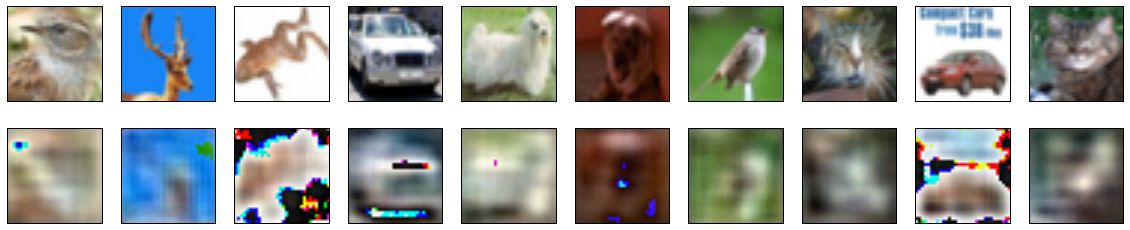

In [9]:

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
X_test = tflearn.data_utils.shuffle(X_test)[0]
# Applying encode and decode over test set
encode_decode = model.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.array(encode_decode[i]).reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()